In [291]:
#Libraries
import pathlib
import random
import string
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import callbacks

In [292]:
import pandas as pd

# load csv
df = pd.read_csv("/content/english_to_malayalam_500k.csv")

# write to required files
df["ml"].to_csv("train.ml", index=False, header=False)
df["en"].to_csv("train.en", index=False, header=False)


In [293]:
eng_file = '/content/train.en'
malayalam_file = '/content/train.ml'

In [294]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [295]:
with open(eng_file, 'r') as file:
    english_sentences = file.readlines()
with open(malayalam_file, 'r') as file:
    malayalam_sentences = file.readlines()

english_sentences = [sentence.rstrip('\n').lower() for sentence in english_sentences]
malayalam_sentences = [sentence.rstrip('\n') for sentence in malayalam_sentences]


In [296]:
malayalam_vocabulary = [
    ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',
    '0','1','2','3','4','5','6','7','8','9', ':', '<', '=', '>', '?',
    "അ","ആ","ഇ","ഈ","ഉ","ഊ","ഋ","എ","ഏ","ഐ","ഒ","ഓ","ഔ",
    "ക","ഖ","ഗ","ഘ","ങ",
    "ച","ഛ","ജ","ഝ","ഞ",
    "ട","ഠ","ഡ","ഢ","ണ",
    "ത","ഥ","ദ","ധ","ന",
    "പ","ഫ","ബ","ഭ","മ",
    "യ","ര","ല","വ",
    "ശ","ഷ","സ","ഹ","ള","ഴ","റ",
    "ാ","ി","ീ","ു","ൂ","ൃ","െ","േ","ൈ","ൊ","ോ","ൌ",
    "ം","ഃ","്",
    "൦","൧","൨","൩","൪","൫","൬","൭","൮","൯"
]

english_vocabulary = [' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',
                        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                        ':', '<', '=', '>', '?', '@',
                        '[', '\\', ']', '^', '_', '`',
                        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
                        'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
                        'y', 'z',
                        '{', '|', '}', '~']


In [297]:
MAX_LEN = 40

malayalam_sentences = open("train.ml", encoding="utf-8").read().splitlines()
english_sentences   = open("train.en", encoding="utf-8").read().splitlines()

valid_sentence_indicies = [
    i for i in range(len(english_sentences))
    if len(english_sentences[i].split()) <= MAX_LEN
    and len(malayalam_sentences[i].split()) <= MAX_LEN
]


In [298]:
len(df)

500000

In [299]:
TOTAL_SENTENCES = 120000
x = [malayalam_sentences[i] for i in valid_sentence_indicies]
y = [english_sentences[i] for i in valid_sentence_indicies]


In [300]:
import pandas as pd
dataset =  pd.DataFrame({"Malayamlam":x , "English":y })
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493843 entries, 0 to 493842
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Malayamlam  493843 non-null  object
 1   English     493843 non-null  object
dtypes: object(2)
memory usage: 7.5+ MB


In [301]:
dataset.sample(5)

,Malayamlam,English
6077,അഞ്ച് പേര്‍ക്ക് പരിക്കേല്‍ക്കുകയും ചെയ്തിരുന്നു.,Five people were injured.
13833,"""ക്ഷാമം ഭൂതലത്തിലൊക്കെയും ഉണ്ടായി. യോസേഫ് പാണ...","""The famine was over all the surface of the ea..."
15453,പക്ഷേ കരുതല്‍ നിര്‍ബന്ധമാക്കുന്ന ജാഗ്രത ഉണ്ടായ...,But there is a caution to be observed.
431854,"""Most Read: ട്രിപ്പിൾ റൈഡിംഗിന് ഓസ്ട്രേലിയയിൽ ...","""Indian Rider Pays Fine Of More Than Rs 66,000..."
317129,10 പേരെ പരുക്കുകളോടെ ആശുപത്രിയില്‍ പ്രവേശിപ്പി...,The 10 injured have been admitted to a hospital.


In [302]:
import os

save_dir = "/content/drive/MyDrive/Project_2_new1"
os.makedirs(save_dir, exist_ok=True)
dataset.to_csv('/content/drive/MyDrive/Project_2_new1/data.csv' , index = False )

In [303]:
dataset = pd.read_csv('/content/english_to_malayalam_500k.csv')
dataset.head()

,en,ml
0,The plot of the movie revolves around the life...,"ക്യാന്‍സറിനോട് പോരാടുന്ന കിസി, മാനി എന്നിവരുടെ..."
1,The same as on the stone.,കല്ലിൽ കണ്ട അതേ രൂപം.
2,"Oommen Chandy, Mullappally Ramachandran, Rames...",മാണി നയിക്കുന്ന കേരള യാത്രയിലുടനീളം ഉമ്മന്‍ചാണ...
3,Many were arrested and jailed.,നിരപരാധികളായ പലരേയും കസ്റ്റഡിയിലെടുത്ത് പീഢിപ്...
4,what has happened?,എന്താണു സംഭവം?


In [304]:
text_pairs = []

for i in range(dataset.shape[0]):
    malayalam = str(dataset["ml"][i])
    english = str(dataset["en"][i])
    text_pairs.append(
        (malayalam, "[start] " + english + " [end]")
    )


In [308]:
text_pairs=text_pairs[:120000]

In [309]:
train_sample_size = len(text_pairs) - int(0.1*len(text_pairs))
train_pairs = text_pairs[:train_sample_size]
test_pairs = text_pairs[train_sample_size:]

In [310]:
print("Total pairs :", len(text_pairs))
print("Train pairs :", len(train_pairs))
print("Test pairs :", len(test_pairs))

Total pairs : 120000
Train pairs : 108000
Test pairs : 12000


In [311]:
strip_chars = string.punctuation + "|"
strip_chars = strip_chars.replace("[", "")
strip_chars = strip_chars.replace("]", "")
strip_chars = strip_chars.replace('""', "")

vocab_size = 35000
sequence_length = 30
batch_size = 64

In [312]:
def custom_standardization(input_string):
    return tf.strings.regex_replace(input_string, "[%s]" % re.escape(strip_chars), "")


In [313]:
eng_vectorization = TextVectorization(
    max_tokens=vocab_size, output_mode="int", output_sequence_length=sequence_length,
)

ml_vectorization = TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length + 1,
    standardize=custom_standardization,
)


In [314]:
train_ml_texts  = [pair[0] for pair in train_pairs]   # Malayalam → encoder
train_eng_texts = [pair[1] for pair in train_pairs]   # English → decoder

ml_vectorization.adapt(train_ml_texts)
eng_vectorization.adapt(train_eng_texts)


In [315]:
import json

# Get the vocabulary
eng_vocab = eng_vectorization.get_vocabulary()
ml_vocab  = ml_vectorization.get_vocabulary()

# Save the vocabulary
with open('/content/eng_vocab.json', 'w') as f:
    json.dump(eng_vocab, f)
with open('/content/ml_vocab.json', 'w') as f:
    json.dump(ml_vocab, f)


In [316]:
import json

vocab_size = 35000
sequence_length = 30
batch_size = 64

# Load the vocabulary
with open('/content/eng_vocab.json', 'r') as f:
    eng_vocab = json.load(f)
with open('/content/ml_vocab.json', 'r') as f:
    ml_vocab = json.load(f)

# Create a TextVectorization layer with the loaded vocabulary
eng_vectorization = TextVectorization(
    vocabulary=eng_vocab,
    output_mode="int",
    output_sequence_length=sequence_length
)

ml_vectorization = TextVectorization(
    vocabulary=ml_vocab,
    output_mode="int",
    output_sequence_length=sequence_length + 1,
    standardize=custom_standardization
)


In [317]:
def format_dataset(malayalam, english):
    malayalam = ml_vectorization(malayalam)
    english = eng_vectorization(english)
    return (
        {
            "encoder_inputs": malayalam,
            "decoder_inputs": english[:, :-1],
        },
        english[:, 1:],
    )


In [318]:
def make_dataset(pairs):
    malayalam_texts, english_texts = zip(*pairs)
    malayalam_texts = list(malayalam_texts)
    english_texts = list(english_texts)
    dataset = tf.data.Dataset.from_tensor_slices((malayalam_texts, english_texts))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset)
    return dataset.shuffle(2048).prefetch(16).cache()


In [319]:
train_ds = make_dataset(train_pairs)
test_ds = make_dataset(test_pairs)

In [320]:
for inputs, targets in train_ds.take(2):
    print(f'inputs["encoder_inputs"].shape: {inputs["encoder_inputs"].shape}')
    print(f'inputs["decoder_inputs"].shape: {inputs["decoder_inputs"].shape}')
    print(f"targets.shape: {targets.shape}")

inputs["encoder_inputs"].shape: (64, 31)
inputs["decoder_inputs"].shape: (64, 29)
targets.shape: (64, 29)
inputs["encoder_inputs"].shape: (64, 31)
inputs["decoder_inputs"].shape: (64, 29)
targets.shape: (64, 29)


In [321]:

class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, mask=None):
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, :], dtype="int32")
        attention_output = self.attention(
            query=inputs, value=inputs, key=inputs, attention_mask=padding_mask
        )
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

In [322]:
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
         return keras.ops.not_equal(inputs, 0)

In [323]:
class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, latent_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.latent_dim = latent_dim
        self.num_heads = num_heads

        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )

        self.dense_proj = keras.Sequential(
            [
                layers.Dense(latent_dim, activation="relu"),
                layers.Dense(embed_dim),
            ]
        )

        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, encoder_outputs, mask=None):
        # Causal self-attention
        causal_mask = self.get_causal_attention_mask(inputs)

        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=causal_mask,
        )
        out_1 = self.layernorm_1(inputs + attention_output_1)

        # Cross-attention (no mask → avoids shape mismatch)
        attention_output_2 = self.attention_2(
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
        )
        out_2 = self.layernorm_2(out_1 + attention_output_2)

        proj_output = self.dense_proj(out_2)
        return self.layernorm_3(out_2 + proj_output)

    def get_causal_attention_mask(self, inputs):
        batch_size = tf.shape(inputs)[0]
        seq_len = tf.shape(inputs)[1]

        i = tf.range(seq_len)[:, tf.newaxis]
        j = tf.range(seq_len)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, seq_len, seq_len))
        return tf.tile(mask, [batch_size, 1, 1])


In [324]:
embed_dim = 256
latent_dim = 512
num_heads = 4

encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="encoder_inputs")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(encoder_inputs)
encoder_outputs = TransformerEncoder(embed_dim, latent_dim, num_heads)(x)
encoder = keras.Model(encoder_inputs, encoder_outputs)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:1474: UserWarning: Layer 'transformer_encoder_6' looks like it has unbuilt state, but Keras is not able to trace the layer `call()` in order to build it automatically. Possible causes:
1. The `call()` method of your layer may be crashing. Try to `__call__()` the layer eagerly on some test input first to see if it works. E.g. `x = np.random.random((3, 4)); y = layer(x)`
2. If the `call()` method is correct, then you may need to implement the `def build(self, input_shape)` method on your layer. It should create all variables used by the layer (e.g. by calling `layer.build()` on all its children layers).
Exception encountered: ''cannot access local variable 'padding_mask' where it is not associated with a value''
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'transformer_encoder_6', however the layer does not have a `build()` method impleme

In [325]:
decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="decoder_inputs")
encoded_seq_inputs = keras.Input(shape=(None, embed_dim), name="decoder_state_inputs")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(decoder_inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, encoded_seq_inputs)
x = layers.Dropout(0.5)(x)
decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)
decoder = keras.Model([decoder_inputs, encoded_seq_inputs], decoder_outputs)

In [326]:
decoder_outputs = decoder([decoder_inputs, encoder_outputs])
transformer = keras.Model(
    [encoder_inputs, decoder_inputs], decoder_outputs, name="transformer"
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'functional_27' (of type Functional) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [327]:
transformer.summary()

Model: "transformer"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_inputs      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_embeddi… │ (None, None, 256) │  8,967,680 │ encoder_inputs[0… │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_12        │ (None, None)      │          0 │ encoder_inputs[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_inputs      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_encode… │ (None, None, 256) │  1,315,840 │ positional_embed… │
│ (TransformerEncode… │                   │            │ not_equal_12[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_27       │ (None, None,      │ 20,330,936 │ decoder_inputs[0… │
│ (Functional)        │ 35000)            │            │ transformer_enco… │
│                     │                   │            │ not_equal_12[0][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 30,614,456 (116.78 MB)

 Trainable params: 30,614,456 (116.78 MB)

 Non-trainable params: 0 (0.00 B)

In [328]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super().__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    step = tf.cast(step, dtype=tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

  def get_config(self):
    return {"d_model": self.d_model.numpy(), "warmup_steps": self.warmup_steps}

In [329]:
learning_rate = CustomSchedule(latent_dim)

optimizer = tf.keras.optimizers.Adam(
    learning_rate=learning_rate,
    beta_1=0.9,
    beta_2=0.98,
    epsilon=1e-9
)


Text(0.5, 0, 'Train Step')

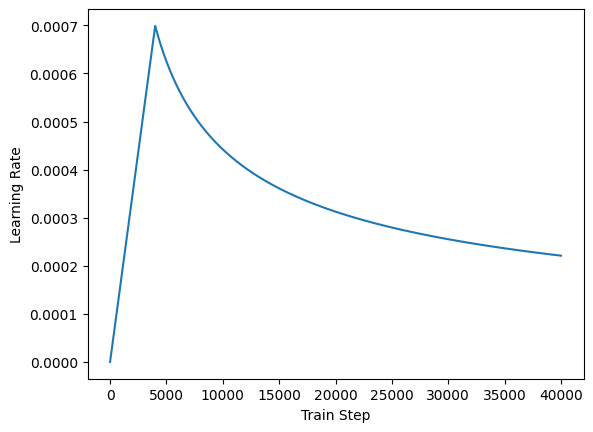

In [330]:
plt.plot(learning_rate(tf.range(40000, dtype=tf.float32)))
plt.ylabel('Learning Rate')
plt.xlabel('Train Step')

In [331]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [332]:
import os

drive_root = "/content/drive/MyDrive/malayalam_transformer"

# Create directories if not exist
os.makedirs(drive_root, exist_ok=True)

checkpoint_filepath = os.path.join(drive_root, "checkpoint_malayalam_transformer.keras")
csv_log_filepath = os.path.join(drive_root, "training_log_malayalam_transformer.csv")
backup_dir = os.path.join(drive_root, "backup_malayalam_transformer")
os.makedirs(backup_dir, exist_ok=True)


In [333]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

csv_logger = callbacks.CSVLogger(csv_log_filepath, append=True)

backup_callback = callbacks.BackupAndRestore(
    backup_dir=backup_dir,
    delete_checkpoint=False
)

all_callbacks = [early_stopping, model_checkpoint_callback, csv_logger, backup_callback]


In [334]:

epochs = 50
transformer.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [336]:
history = transformer.fit(train_ds,
                epochs=epochs,
                validation_data=test_ds ,
                callbacks=[
                      early_stopping ,
                      model_checkpoint_callback ,
                      csv_logger ,
                      backup_callback ] )

Epoch 12/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 155s 92ms/step - accuracy: 0.2171 - loss: 3.1276 - val_accuracy: 0.1422 - val_loss: 4.7300
Epoch 13/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 161s 95ms/step - accuracy: 0.2236 - loss: 3.0326 - val_accuracy: 0.1421 - val_loss: 4.8166
Epoch 14/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 179s 106ms/step - accuracy: 0.2298 - loss: 2.9478 - val_accuracy: 0.1414 - val_loss: 4.8646
Epoch 15/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 160s 95ms/step - accuracy: 0.2356 - loss: 2.8647 - val_accuracy: 0.1406 - val_loss: 4.9212
Epoch 16/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 160s 95ms/step - accuracy: 0.2413 - loss: 2.7897 - val_accuracy: 0.1389 - val_loss: 4.9801
Epoch 17/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 166s 98ms/step - accuracy: 0.2466 - loss: 2.7180 - val_accuracy: 0.1375 - val_loss: 5.0518


In [338]:
transformer.save('/content/Malayalam.keras')


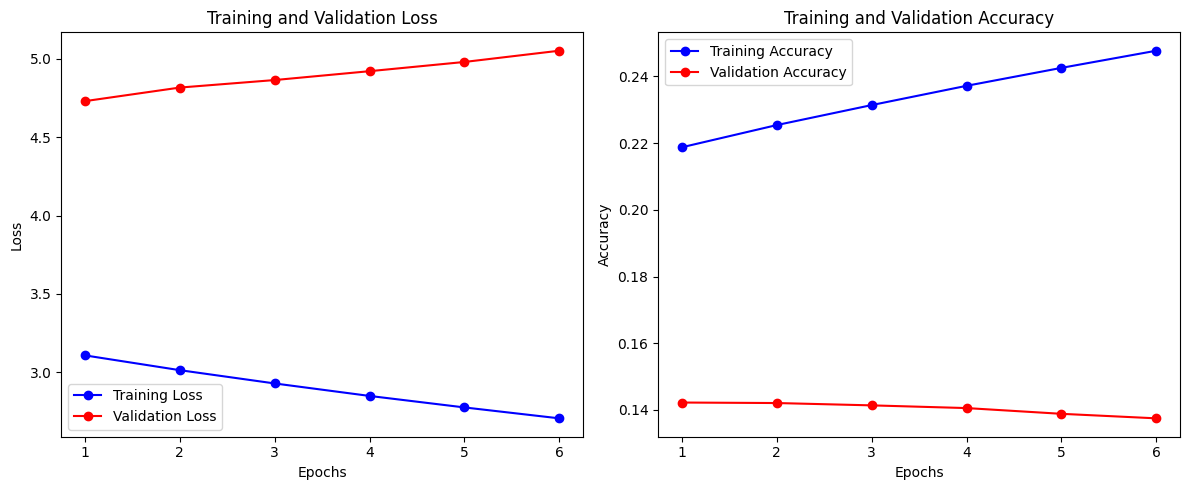

In [339]:
import os
def plot_loss_and_accuracy(history, save_dir=None, filename=None):
    # Extract the loss and accuracy values from the history object
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Get the number of epochs
    epochs = range(1, len(loss) + 1)

    # Plot training and validation loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()

    plt.show()
plot_loss_and_accuracy(history ,"/content/drive/MyDrive/NMT-Project", "V1-50k-106M_trainloss.png" )

In [340]:
en_vocab = eng_vectorization.get_vocabulary()
en_index_lookup = dict(zip(range(len(en_vocab)), en_vocab))


In [341]:
def greedy_translate(encoder_input, max_len=30):
    encoder_input = tf.expand_dims(encoder_input, 0)

    # Encode once
    encoder_outputs = encoder(encoder_input, training=False)

    decoded_tokens = ["[start]"]

    for _ in range(max_len):
        decoder_input = eng_vectorization([" ".join(decoded_tokens)])

        predictions = decoder(
            [decoder_input, encoder_outputs],
            training=False
        )

        step = len(decoded_tokens) - 1
        next_token_id = tf.argmax(predictions[0, step]).numpy()
        next_token = en_vocab[next_token_id]

        if next_token == "[end]":
            break

        decoded_tokens.append(next_token)

    return " ".join(decoded_tokens[1:])
def decode_tokens(token_ids, vocab):
    words = []
    for t in token_ids:
        if t == 0 or t >= len(vocab):
            continue
        token = vocab[t]
        if token == "[end]":
            break
        words.append(token)
    return " ".join(words)


In [342]:
for i in range(10):
    idx = i

    encoder_input = inputs["encoder_inputs"][idx].numpy()
    ground_truth  = targets[idx].numpy()

    print("Malayalam (Input):")
    print(decode_tokens(encoder_input, ml_vocab))

    print("\nEnglish (Ground Truth):")
    print(decode_tokens(ground_truth, en_vocab))

    print("\nEnglish (Model Output):")
    print(greedy_translate(encoder_input))


Malayalam (Input):
ജസ്റ്റിസ് [UNK] അധ്യക്ഷനായ ഫീസ് [UNK] ഫീസ് കൂട്ടി നിശ്ചയിച്ചത്

English (Ground Truth):
the committee headed by justice r rajendra babu had fixed a fee of rs end

English (Model Output):
the committee was set to become a notice to the [UNK] of justice and the [UNK] of justice as the [UNK] and the [UNK] committee of the world war was
Malayalam (Input):
അങ്ങനെ അവസാനം എനിക്ക് ഒരു [UNK]

English (Ground Truth):
so i finally quit my job end

English (Model Output):
so when i had become a war before the [UNK] war came to the world war before the [UNK] war before the [UNK] war before the [UNK] war was a
Malayalam (Input):
ഒരു [UNK] [UNK] ദാവീദ്‌ ദൈവത്തോടു വിശ്വസ്‌തത [UNK] അവനിൽ [UNK] ചെയ്‌തു

English (Ground Truth):
david was not perfect but he was loyal to god and trusted in him end

English (Model Output):
david was a [UNK] man who became the people to give him to the great fight against him and the [UNK] was [UNK] to the [UNK] and the [UNK] was
Malayalam (Input):
[UNK] ന

In [ ]:
!pip install --quiet evaluate sacrebleu bert_score rouge_score


In [ ]:

import sacrebleu
import evaluate

# Assume text_pairs = [(english_sentence, hindi_reference), ...]
test_pairs = text_pairs[:200]

refs = [[ref.replace("[start] ", "").replace(" [end]", "") for _, ref in test_pairs]]
hyps = [decode_sequence(eng) for eng, _ in test_pairs]

# Store scores
scores = {}

# SacreBLEU
bleu = sacrebleu.corpus_bleu(hyps, refs)
scores["SacreBLEU"] = bleu.score

# METEOR
meteor = evaluate.load("meteor")
meteor_score = meteor.compute(predictions=hyps, references=refs[0])
scores["METEOR"] = meteor_score["meteor"]

# TER
ter = evaluate.load("ter")
ter_score = ter.compute(predictions=hyps, references=refs[0])
scores["TER"] = ter_score["score"]  # lower is better

# chrF++
chrf = evaluate.load("chrf")
chrf_score = chrf.compute(predictions=hyps, references=refs[0])
scores["chrF++"] = chrf_score["score"]

# BERTScore (semantic similarity)
try:
    bertscore = evaluate.load("bertscore")
    bertscore_score = bertscore.compute(predictions=hyps, references=refs[0], lang="en")
    scores["BERTScore (F1)"] = sum(bertscore_score["f1"]) / len(bertscore_score["f1"]) * 100
except Exception as e:
    print("BERTScore could not be computed:", e)

# ROUGE-L
rouge = evaluate.load("rouge")
rouge_score = rouge.compute(predictions=hyps, references=refs[0])
scores["ROUGE-L"] = rouge_score["rougeL"] * 100

# Print all scores
print("All metrics:")
for k, v in scores.items():
    print(f"{k}: {v:.4f}")

# Select top 3 scores (higher is better, TER is reversed)
sorted_scores = sorted(
    scores.items(),
    key=lambda x: x[1] if x[0] != "TER" else -x[1],
    reverse=True
)
print("\nTop 3 metrics:")
for metric, value in sorted_scores[:3]:
    print(f"{metric}: {value:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'functional_3' (of type Functional) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


All metrics:
SacreBLEU: 3.3664
METEOR: 0.2285
TER: 125.6854
chrF++: 24.5112
BERTScore (F1): 87.3126
ROUGE-L: 0.0000

Top 3 metrics:
BERTScore (F1): 87.3126
chrF++: 24.5112
SacreBLEU: 3.3664
